DICODING

SHERINA ERIA HASTALINA

In [1]:
#import library yg digunakan
import tensorflow as tf
import numpy as np
import shutil
import matplotlib.pyplot as plt
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop

In [2]:
# download file
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-26 23:51:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  33.6MB/s    in 10s     

2021-04-26 23:51:37 (30.9 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#ekstrak dataset
file_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('data')
zip_ref.close()

In [4]:
os.listdir('data/rockpaperscissors')

['README_rpc-cv-images.txt', 'paper', 'scissors', 'rps-cv-images', 'rock']

In [6]:
!pip install split_folders

In [7]:
import splitfolders

splitfolders.ratio('data/rockpaperscissors/rps-cv-images', 'data/rockpaperscissors/train_val', seed=1, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3504.48 files/s]


In [8]:
#membuat direktori baru
base_dir = 'data/rockpaperscissors/train_val'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
# membuat direktori train dan validation
os.listdir('data/rockpaperscissors/train_val/train')
os.listdir('data/rockpaperscissors/train_val/val')

['paper', 'scissors', 'rock']

In [10]:
# membuat direktori rock, paper, scissors pada data training
train_batu = os.path.join(train_dir, 'rock')
train_kertas = os.path.join(train_dir, 'paper')
train_gunting = os.path.join(train_dir, 'scissors')

# membuat direktori batu,kertas,gunting pada data validasi
val_batu = os.path.join(validation_dir, 'rock')
val_kertas = os.path.join(validation_dir, 'paper')
val_gunting = os.path.join(validation_dir, 'scissors')


In [11]:
b_dir = os.path.join(base_dir,'rock')
k_dir = os.path.join(base_dir, 'paper')
g_dir = os.path.join(base_dir, 'scissors')

In [12]:
#train dan test ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  shear_range=0.2, 
  rotation_range=20, 
  horizontal_flip=True,
  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
  rescale=1./255, 
  shear_range=0.2, 
  rotation_range=20, 
  horizontal_flip=True,
  fill_mode = 'nearest')

#train dan test generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [14]:
# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_batu):
  os.mkdir(train_batu)
if not os.path.exists(train_kertas):
  os.mkdir(train_kertas)
if not os.path.exists(train_gunting):
  os.mkdir(train_gunting)

if not os.path.exists(val_batu):
  os.mkdir(val_batu)
if not os.path.exists(val_kertas):
  os.mkdir(val_kertas)
if not os.path.exists(val_gunting):
  os.mkdir(val_gunting)

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2,
    verbose =2,
     
     )

Epoch 1/10
25/25 - 45s - loss: 0.9125 - accuracy: 0.5462 - val_loss: 0.4139 - val_accuracy: 0.8906
Epoch 2/10
25/25 - 43s - loss: 0.3882 - accuracy: 0.8550 - val_loss: 0.2209 - val_accuracy: 0.9062
Epoch 3/10
25/25 - 43s - loss: 0.2336 - accuracy: 0.9312 - val_loss: 0.2256 - val_accuracy: 0.9375
Epoch 4/10
25/25 - 43s - loss: 0.1973 - accuracy: 0.9262 - val_loss: 0.0928 - val_accuracy: 0.9688
Epoch 5/10
25/25 - 43s - loss: 0.1770 - accuracy: 0.9475 - val_loss: 0.2418 - val_accuracy: 0.9375
Epoch 6/10
25/25 - 43s - loss: 0.1433 - accuracy: 0.9638 - val_loss: 0.1676 - val_accuracy: 0.9688
Epoch 7/10
25/25 - 43s - loss: 0.1790 - accuracy: 0.9325 - val_loss: 0.1114 - val_accuracy: 0.9219
Epoch 8/10
25/25 - 43s - loss: 0.1280 - accuracy: 0.9488 - val_loss: 0.1004 - val_accuracy: 0.9844
Epoch 9/10
25/25 - 43s - loss: 0.1073 - accuracy: 0.9675 - val_loss: 0.1014 - val_accuracy: 0.9688
Epoch 10/10
25/25 - 43s - loss: 0.0915 - accuracy: 0.9638 - val_loss: 0.0334 - val_accuracy: 1.0000


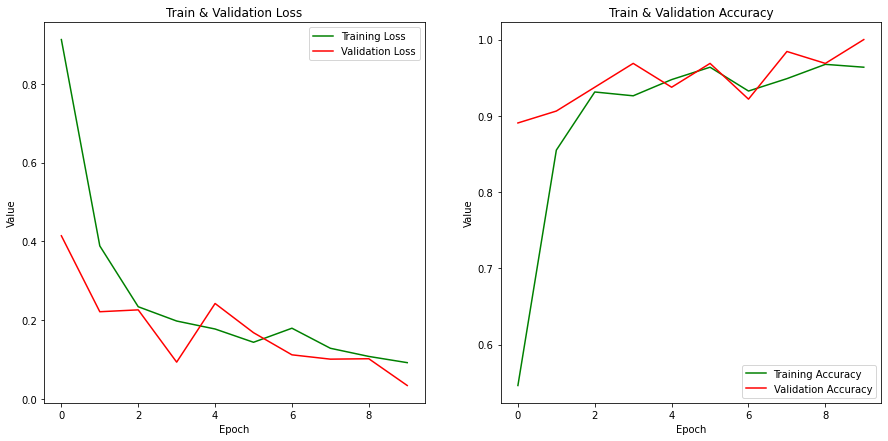

In [17]:
#loss train & validation
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Train & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

#accuracy train & validation
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Train & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
Paper/Kertas


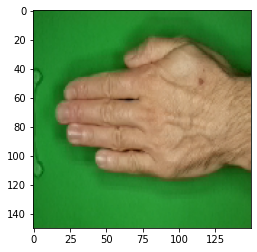

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes[0,0]!=0:
    print('Paper/Kertas')
  elif classes[0,1]!=0:
    print('Rock/batu')
  else:
    print('Scissors/Gunting')